# Product Price finder

## 농수산물


- Data Source : [농식품 빅데이터 거래소](https://kadx.co.kr/product/detail/94534d90-595d-11eb-acdd-9560621d9652)

- Collection Method : Download

- Data Format : CSV

### 데이터 설명

- 일반농산물 도매 69품목 116품종, 소매 90품목 143품종 및 친환경농산물 38품목 44종 대상 가격 자료

### 컬럼 설명

In [3]:
col_detail={
'prce_reg_ymd' : '가격등록일자',
'mrkt_esnt_no' : '시장고유번호',
'mrkt_code' : '시장코드',
'mrkt_nm' : '시장명',
'ct_code' : '시도코드',
'ctnp_nm' : '시도명',
'sggu_code' : '시군구코드',
'sggu_nm' : '시군구명',
'pdlt_code' : '품목코드',
'pdlt_nm' : '품목명',
'spcs_code' : '품종코드',
'spcs_nm' : '품종명',
'wsrt_exmn_se_code' : '도소매조사구분코드',
'exmn_se_nm' : '조사구분명',
'bulk_grad_code' : '산물등급코드',
'bulk_grad_nm' : '산물등급명',
'pdlt_prce' : '품목가격',
'mtc_smt_unit_mg' : '산지출하단위크기',
'mtc_smt_unit_nm' : '산지출하단위명',
'whsl_smt_unit_mg' : '도매출하단위크기',
'whsl_smt_unit_nm' : '도매출하단위명',
'rtsl_smt_unit_mg' : '소매출하단위크기',
'rtsl_smt_unit_nm' : '소매출하단위명',
'evfd_fmpd_smt_unit_mg' : '친환경농산물출하단위크기',
'evfd_fmpd_smt_unit_nm' : '친환경농산물출하단위명',
'dcnt_prce_yn' : '할인가격여부',
'etl_ldg_dt' : 'ETL적재일시'
}ㅌㅁ

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

root_path = "../"
data_path = f"{root_path}data"

# 데이터 정보

파일 호출, 변수명 및 불러오기 경로는 자신에게 맞게 변경해주시면 됩니다.

In [5]:
import os
os.listdir(data_path)

['관측지점정보.csv',
 'Economic_growth_rate_20052021.xlsx',
 '생산자물가지수_품목별_연도별.xlsx',
 '생산자물가지수_품목별_연도별_월별.xlsx',
 '소비자물가지수_품목별_연도별.xlsx',
 '소비자물가지수_품목별_연도별_월별.xlsx',
 '주요경제지표_20052021.xlsx',
 'output',
 'TB_TAT_KAMIS_PRC_MK_TB',
 '기상청25_작물별_농업주산지_상세날씨_조회서비스_오픈API활용가이드',
 '작물별_농업주산지_상세날씨_조회서비스__지역코드_22.05.xlsx',
 '~$작물별_농업주산지_상세날씨_조회서비스__지역코드_22.05.xlsx']

In [6]:
files = os.listdir('data')

OSError: [WinError 433] 없는 장치를 지정했습니다: 'data'

In [ ]:
df = pd.DataFrame()
for file in files:
    df_sub = pd.read_csv(f'data/{file}', encoding='cp949', low_memory=False)
    df_sub = df_sub[['PRCE_REG_YMD', 'CTNP_NM', 'PDLT_NM', 'EXMN_SE_NM', 'BULK_GRAD_NM', 'PDLT_PRCE']]
    df_sub = df_sub[~df_sub['PDLT_NM'].isna()]
    df_sub.columns=['YMD', 'Region', 'Product', 'WR', 'Grade', 'Price']
    df = pd.concat([df, df_sub])

# 1. 년·월·일 에서 연·월 로 변경
# 2. Y(년), M(월) 컬럼 생성

In [ ]:
df['YMD'] = df['YMD'].astype(str)
df['YMD'] = df['YMD'].map(lambda x:x[:6])

df['Y'] = df['YMD'].map(lambda x:x[:4]).astype('int16')
df['M'] = df['YMD'].map(lambda x:x[4:]).astype('int8')

In [ ]:
# 20년 데이터만 있는 품목 제외

df = df[~df['Product'].isin(['즉석밥', '두부', '김치', '고추장', '된장', '간장', '맛김(조미김)', '콩나물'])]

In [ ]:
# Wholesale : 도매
df_w = df[df['WR']=='도매']

In [ ]:
# Retail : 소매
df_r = df[df['WR']=='소매']

In [ ]:
product_w = df_w['Product'].unique()
product_w = product_w.tolist()

In [ ]:
product_r = df_r['Product'].unique()
product_r = product_r.tolist()

# 물가지수 파일과 겹치는 품목 확인

In [ ]:
df_1 = pd.read_csv('소비자물가지수_품목별_연도별_월별_filtered.csv')

In [ ]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '\u3000\u3000\u3000(농산물)곡물',
       '\u3000\u3000\u3000\u3000\u3000\u3000쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000현미',
       '\u3000\u3000\u3000\u3000\u3000\u3000찹쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000보리쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000콩',
       '\u3000\u3000\u3000\u3000\u3000\u3000땅콩',
       '\u3000\u3000\u3000\u3000\u3000\u3000혼식곡',
       '\u3000\u3000\u3000(농산물)채소',
       '\u3000\u3000\u3000\u3000\u3000\u3000배추',
       '\u3000\u3000\u3000\u3000\u3000\u3000상추',
       '\u3000\u3000\u3000\u3000\u3000\u3000시금치',
       '\u3000\u3000\u3000\u3000\u3000\u3000양배추',
       '\u3000\u3000\u3000\u3000\u3000\u3000미나리',
       '\u3000\u3000\u3000\u3000\u3000\u3000깻잎',
       '\u3000\u3000\u3000\u3000\u3000\u3000부추',
       '\u3000\u3000\u3000\u3000\u3000\u3000무',
       '\u3000\u3000\u3000\u3000\u3000\u3000열무',
       '\u3000\u3000\u3000\u3000\u3000\u3000당근',
       '\u3000\u3000\u3000\u3000\u3000\u3000감자',
       '\u3000\u3000\u3000\u

In [ ]:
# replace로 \u3000 값이 사라지지 않는다.. 이유는 모르겠음
df_1['품목별'] = df_1['품목별'].replace('\u3000', '')

In [ ]:
df_1['품목별'] = df_1['품목별'].map(lambda x:x.strip(('\u3000')))

In [ ]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '(농산물)곡물', '쌀', '현미', '찹쌀', '보리쌀', '콩', '땅콩',
       '혼식곡', '(농산물)채소', '배추', '상추', '시금치', '양배추', '미나리', '깻잎', '부추', '무',
       '열무', '당근', '감자', '고구마', '도라지', '콩나물', '버섯', '오이', '풋고추', '호박',
       '가지', '토마토', '파', '양파', '마늘', '브로콜리', '고사리', '파프리카', '생강',
       '(농산물)과실', '사과', '배', '복숭아', '포도', '밤', '감', '귤', '오렌지', '참외',
       '수박', '딸기', '바나나', '키위'], dtype=object)

In [ ]:
df['Product'].unique()

array(['쌀', '찹쌀', '콩', '팥', '녹두', '메밀', '고구마', '감자', '배추', '양배추', '시금치',
       '상추', '수박', '오이', '호박', '토마토', '무', '당근', '건고추', '풋고추', '붉은고추',
       '피마늘', '깐마늘(국산)', '깐마늘(수입)', '양파', '파', '생강', '미나리', '깻잎', '피망',
       '참깨', '들깨', '땅콩', '느타리버섯', '팽이버섯', '사과', '배', '포도', '감귤', '단감',
       '바나나', '참다래', '오렌지', '방울토마토', '고등어', '갈치', '명태', '물오징어', '건멸치',
       '북어', '건오징어', '김', '건미역', '굴', '수입조기', '돼지고기', '닭고기', '계란', '우유',
       '딸기', '참외', '복숭아', '쇠고기', '파프리카', '멜론', '새송이버섯', '얼갈이배추', '열무',
       '건포도', '건블루베리', '레몬', '체리', '아몬드', '자몽', '호두', '고춧가루', '굵은소금',
       '멸치액젓', '새우젓', '망고', '파인애플', '갓', '가지', '부추', '새우', '전복', '꽁치',
       '브로콜리', '청경채', '케일', '양송이버섯', '표고버섯', '귀리', '보리', '수수', '율무',
       '양상추', '혼합곡'], dtype=object)

In [ ]:
df_1.loc[df_1['품목별']=='마늘', ['품목별']] = '피마늘'

In [ ]:
Product_list=[]

for i in df['Product'].unique():
    if i in df_1['품목별'].unique():
        Product_list.append(i)

print(Product_list)

['쌀', '찹쌀', '콩', '고구마', '감자', '배추', '양배추', '시금치', '상추', '수박', '오이', '호박', '토마토', '무', '당근', '풋고추', '피마늘', '양파', '파', '생강', '미나리', '깻잎', '땅콩', '사과', '배', '포도', '바나나', '오렌지', '딸기', '참외', '복숭아', '파프리카', '열무', '가지', '부추', '브로콜리']


In [ ]:
len(Product_list)

36

# 함수 구현

In [ ]:
def Finder():
    product = input('품목을 입력하세요. : ')
    start = int(input('시작 연도를 입력하세요. (4자리) : '))
    end = int(input('끝 연도를 입력하세요. (4자리) : '))
    
    print()
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif (product in product_w) & (min(df_w[df_w['Product']==product]['Y']) < start) & (max(df_w[df_w['Product']==product]['Y']) > end):
        df_w[(df_w['Product']==product) & (df_w['Y'] >= start) & (df_w['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)
    
    else:
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif (product in product_r) & (min(df_r[df_r['Product']==product]['Y']) < start) & (max(df_r[df_r['Product']==product]['Y']) > end):
        df_r[(df_r['Product']==product) & (df_r['Y'] >= start) & (df_r['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)
        
    else:
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        

품목을 입력하세요. : 피마늘
시작 연도를 입력하세요. (4자리) : 2013
끝 연도를 입력하세요. (4자리) : 2017

해당 일자에 제품의 소매 거래내역이 없습니다.


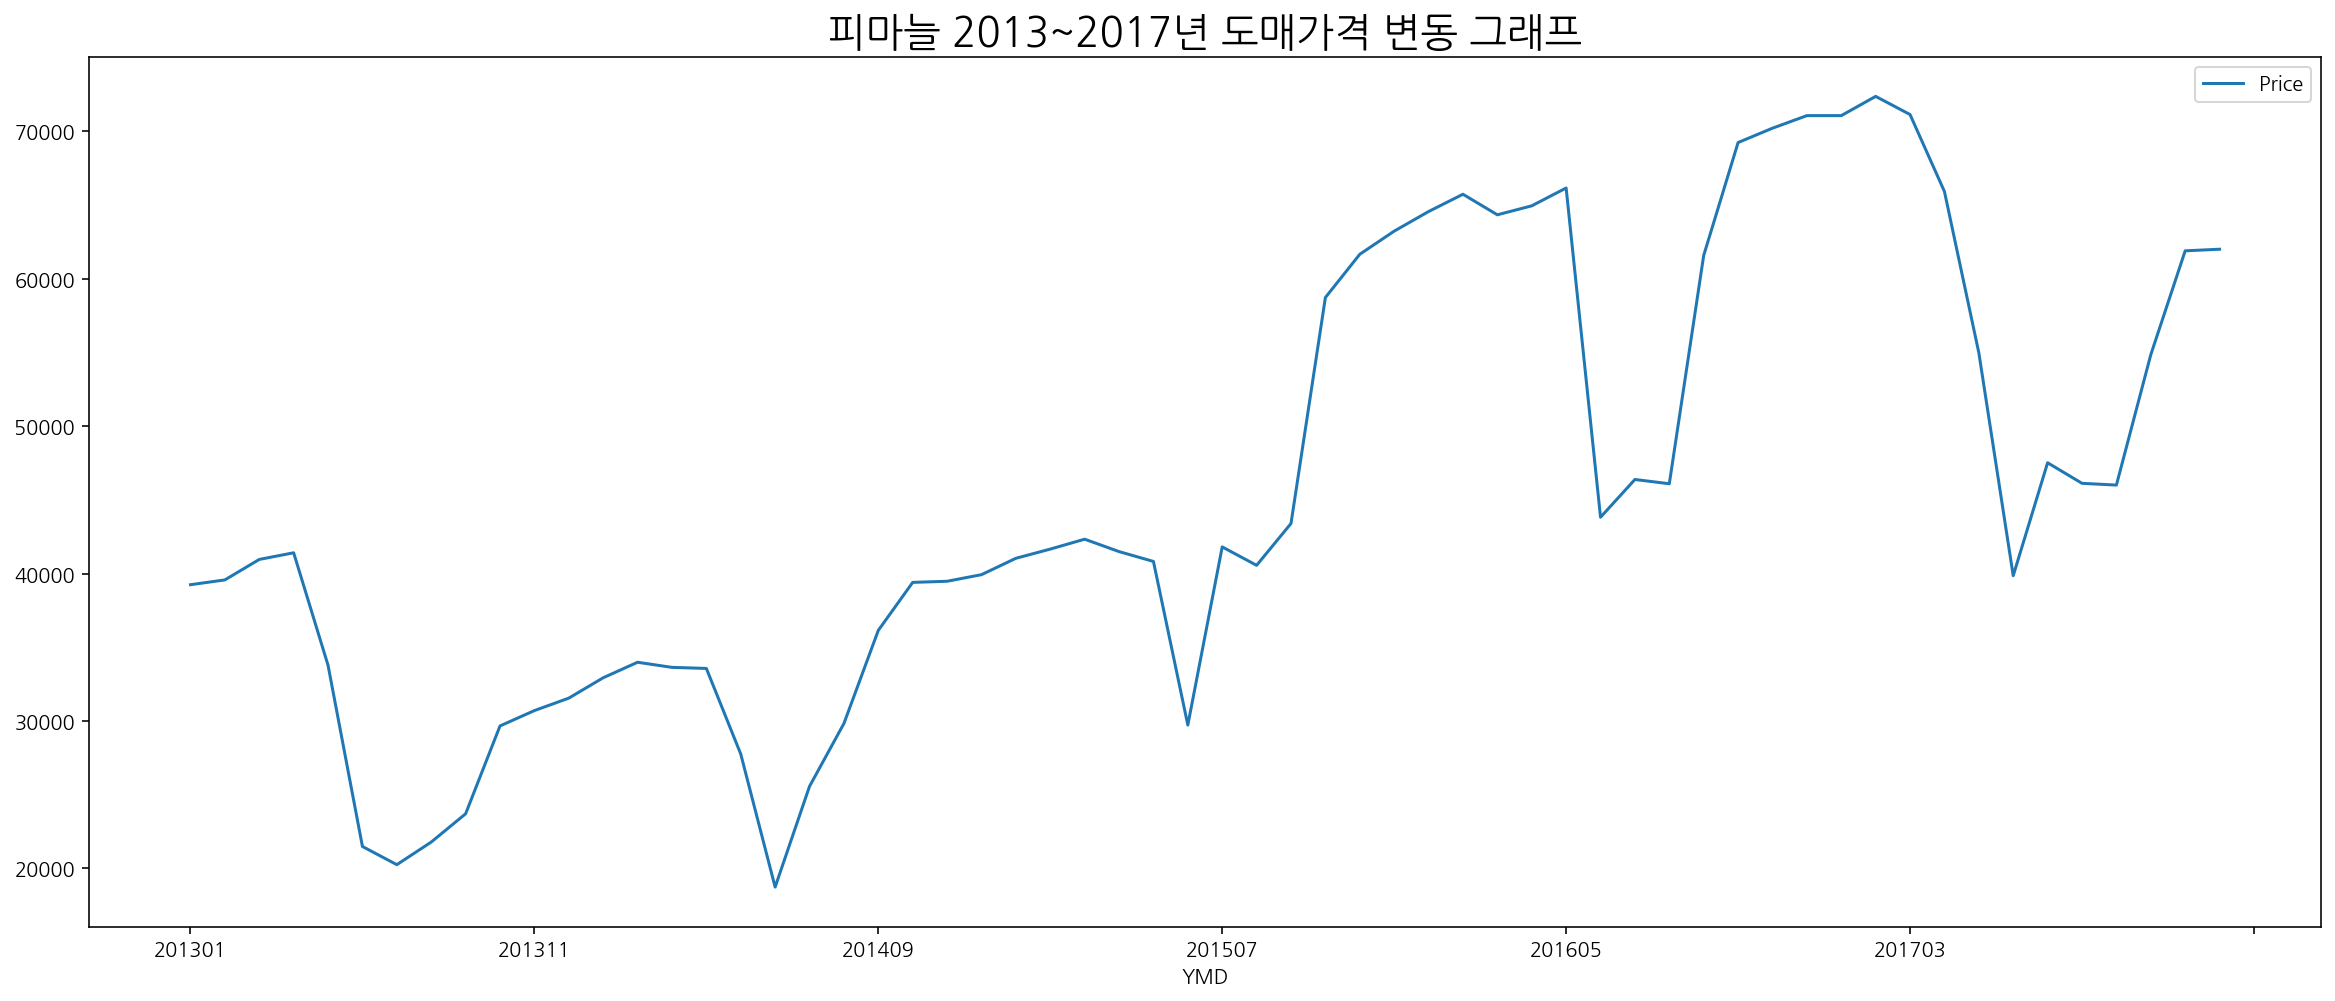

In [ ]:
Finder()